In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib #   !pip install dlib
from imutils import face_utils

# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/test_opencv'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['img_160.jpg',
 'img_220.jpg',
 'img_280.jpg',
 'img_200.jpg',
 'img_260.jpg',
 'img_320.jpg',
 'models',
 '.ipynb_checkpoints']

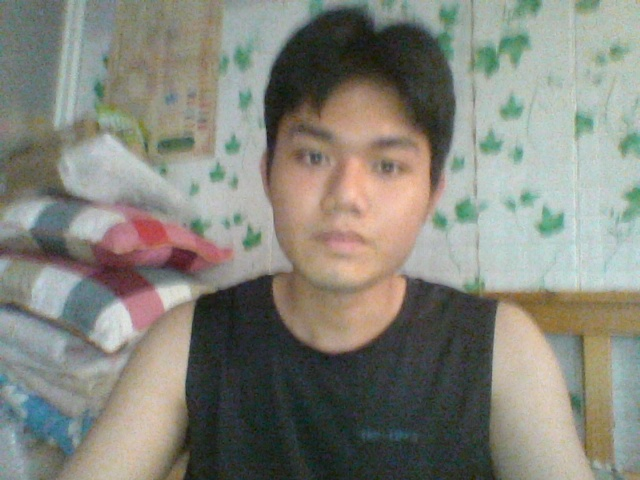

In [2]:
# Hien thi mot anh
img = cv2.imread(path + "/img_160.jpg")
cv2_imshow(img)

In [5]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
print(face_landmarks_model_path)
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
print(face_recognition_model_path)
img_path = path+  "/img_160.jpg"



/content/drive/MyDrive/test_opencv/models/shape_predictor_68_face_landmarks.dat
/content/drive/MyDrive/test_opencv/models/dlib_face_recognition_resnet_model_v1.dat


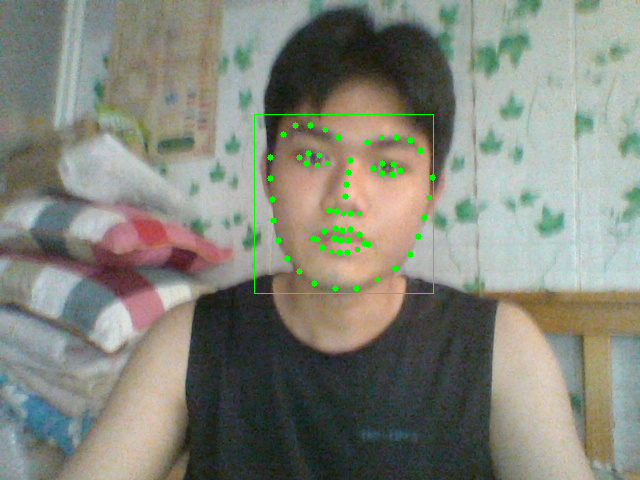

In [6]:
# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

    # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    # print(face_descriptors)

    # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)